# Creating a deployment model for the Iris data prediction

<b>Import required libraries</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<b>Reading data<b/>

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X = df.drop('species', axis=1)

In [5]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y = df['species']

In [7]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [8]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<b>Do One Hot Encoding<b/>

In [9]:
from sklearn.preprocessing import LabelBinarizer

In [10]:
encoder = LabelBinarizer()

In [11]:
y = encoder.fit_transform(y)

In [12]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [13]:
type(y)

numpy.ndarray

<b>Do Train Test Split<b/>

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [17]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [18]:
X_scaled_train.shape

(105, 4)

<b>Creating the model<b/>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model = Sequential()

model.add(Dense(8, activation='relu', input_shape=[4,]))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

<b>Train the model<b/>

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop = EarlyStopping(patience=10)

In [23]:
model.fit(X_scaled_train, y_train, epochs= 200, validation_data=(X_scaled_test, y_test), callbacks=[early_stop])

Train on 105 samples, validate on 45 samples
Epoch 1/200
105/105 [==============================] - 1s 9ms/sample - loss: 1.1000 - accuracy: 0.3810 - val_loss: 1.1300 - val_accuracy: 0.4444
Epoch 2/200
105/105 [==============================] - 0s 289us/sample - loss: 1.0934 - accuracy: 0.4000 - val_loss: 1.1240 - val_accuracy: 0.4667
Epoch 3/200
105/105 [==============================] - 0s 324us/sample - loss: 1.0870 - accuracy: 0.4381 - val_loss: 1.1175 - val_accuracy: 0.4667
Epoch 4/200
105/105 [==============================] - 0s 286us/sample - loss: 1.0808 - accuracy: 0.4571 - val_loss: 1.1106 - val_accuracy: 0.4667
Epoch 5/200
105/105 [==============================] - 0s 324us/sample - loss: 1.0745 - accuracy: 0.4762 - val_loss: 1.1039 - val_accuracy: 0.4889
Epoch 6/200
105/105 [==============================] - 0s 276us/sample - loss: 1.0682 - accuracy: 0.4762 - val_loss: 1.0976 - val_accuracy: 0.5111
Epoch 7/200
105/105 [==============================] - 0s 276us/sample - lo

Epoch 56/200
105/105 [==============================] - 0s 295us/sample - loss: 0.7456 - accuracy: 0.6952 - val_loss: 0.7493 - val_accuracy: 0.6000
Epoch 57/200
105/105 [==============================] - 0s 295us/sample - loss: 0.7404 - accuracy: 0.6952 - val_loss: 0.7435 - val_accuracy: 0.6000
Epoch 58/200
105/105 [==============================] - 0s 305us/sample - loss: 0.7351 - accuracy: 0.6952 - val_loss: 0.7379 - val_accuracy: 0.6000
Epoch 59/200
105/105 [==============================] - 0s 219us/sample - loss: 0.7301 - accuracy: 0.6952 - val_loss: 0.7330 - val_accuracy: 0.6000
Epoch 60/200
105/105 [==============================] - 0s 219us/sample - loss: 0.7249 - accuracy: 0.6952 - val_loss: 0.7276 - val_accuracy: 0.6000
Epoch 61/200
105/105 [==============================] - 0s 257us/sample - loss: 0.7199 - accuracy: 0.6952 - val_loss: 0.7220 - val_accuracy: 0.6000
Epoch 62/200
105/105 [==============================] - 0s 228us/sample - loss: 0.7150 - accuracy: 0.6952 - val_

Epoch 111/200
105/105 [==============================] - 0s 276us/sample - loss: 0.5332 - accuracy: 0.9238 - val_loss: 0.5044 - val_accuracy: 0.9556
Epoch 112/200
105/105 [==============================] - 0s 267us/sample - loss: 0.5307 - accuracy: 0.9238 - val_loss: 0.5017 - val_accuracy: 0.9556
Epoch 113/200
105/105 [==============================] - 0s 257us/sample - loss: 0.5281 - accuracy: 0.9238 - val_loss: 0.4992 - val_accuracy: 0.9556
Epoch 114/200
105/105 [==============================] - 0s 295us/sample - loss: 0.5255 - accuracy: 0.9143 - val_loss: 0.4966 - val_accuracy: 0.9556
Epoch 115/200
105/105 [==============================] - 0s 276us/sample - loss: 0.5230 - accuracy: 0.9143 - val_loss: 0.4937 - val_accuracy: 0.9556
Epoch 116/200
105/105 [==============================] - 0s 267us/sample - loss: 0.5204 - accuracy: 0.9238 - val_loss: 0.4913 - val_accuracy: 0.9556
Epoch 117/200
105/105 [==============================] - 0s 288us/sample - loss: 0.5179 - accuracy: 0.9238

Epoch 166/200
105/105 [==============================] - 0s 257us/sample - loss: 0.4235 - accuracy: 0.9524 - val_loss: 0.3850 - val_accuracy: 0.9778
Epoch 167/200
105/105 [==============================] - 0s 247us/sample - loss: 0.4222 - accuracy: 0.9619 - val_loss: 0.3823 - val_accuracy: 0.9778
Epoch 168/200
105/105 [==============================] - 0s 238us/sample - loss: 0.4202 - accuracy: 0.9524 - val_loss: 0.3812 - val_accuracy: 0.9778
Epoch 169/200
105/105 [==============================] - 0s 228us/sample - loss: 0.4184 - accuracy: 0.9524 - val_loss: 0.3815 - val_accuracy: 0.9778
Epoch 170/200
105/105 [==============================] - 0s 238us/sample - loss: 0.4172 - accuracy: 0.9333 - val_loss: 0.3819 - val_accuracy: 0.9556
Epoch 171/200
105/105 [==============================] - 0s 267us/sample - loss: 0.4160 - accuracy: 0.9238 - val_loss: 0.3819 - val_accuracy: 0.9778
Epoch 172/200
105/105 [==============================] - 0s 247us/sample - loss: 0.4149 - accuracy: 0.9238

<b>Plotting model accuracy and loss<b/>

In [24]:
model_performance = pd.DataFrame(model.history.history)

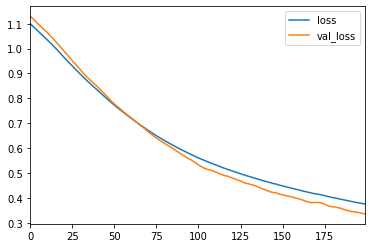

In [25]:
model_performance[['loss', 'val_loss']].plot()

In [26]:
model_performance.head()

,loss,accuracy,val_loss,val_accuracy
0,1.100011,0.380952,1.129995,0.444444
1,1.093408,0.400000,1.124019,0.466667
2,1.087018,0.438095,1.117544,0.466667
3,1.080776,0.457143,1.110555,0.466667
4,1.074535,0.476190,1.103890,0.488889


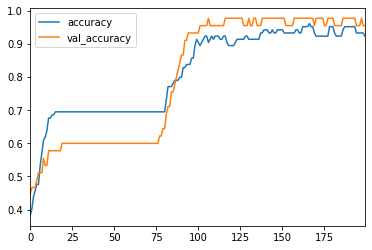

In [27]:
model_performance[['accuracy', 'val_accuracy']].plot()

In [28]:
model.evaluate(X_scaled_test, y_test, verbose=0)

[0.3358978165520562, 0.95555556]

<b>Save the model<b/>

In [29]:
model.save('iris_model_pred.h5')

<b>Save the scaler instance<b/>

In [30]:
import joblib

In [31]:
joblib.dump(scaler, 'iris_scaler.pkl')

['iris_scaler.pkl']

<b>Load model and scaler<b/>

In [32]:
from tensorflow.keras.models import load_model

In [33]:
flower_model = load_model('iris_model_pred.h5')

In [34]:
flower_scaler = joblib.load('iris_scaler.pkl')

<b>Creating Model Prediction Function<b/>

In [35]:
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [37]:
flower_example = {"sepal_length": 5.1,
                 "sepal_width": 3.5,
                 "petal_length": 1.4,
                 "petal_width": 0.2}

In [38]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [48]:
def model_prediction(model, scaler, sample_json):
    
    s_len = sample_json['sepal_length']
    s_width = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_width = sample_json['petal_width']
    
    flower = [[s_len, s_width, p_len, p_width]]
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    flower = scaler.transform(flower)
    
    class_index = model.predict_classes(flower)[0]
    
    return classes[class_index]

In [49]:
model_prediction(flower_model, flower_scaler, flower_example)

'setosa'

# Deployment Code

In [52]:
from tensorflow.keras.models import load_model
import joblib
import numpy as np

flower_model = load_model('iris_model_pred.h5')
flower_scaler = joblib.load('iris_scaler.pkl')

def model_prediction(model, scaler, sample_json):
    
    s_len = sample_json['sepal_length']
    s_width = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_width = sample_json['petal_width']
    
    flower = [[s_len, s_width, p_len, p_width]]
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    flower = scaler.transform(flower)
    
    class_index = model.predict_classes(flower)[0]
    
    return classes[class_index]